In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import os
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Interpolacion.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Interpolacion.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [3]:
Data = pd.read_csv(Path_)
Data

,X,Y
0,5,10
1,10,15
2,15,25


In [4]:
X = np.float64(Data.X)
Y = np.float64(Data.Y)
print(X,Y)

[ 5. 10. 15.] [10. 15. 25.]


In [ ]:
#X = np.array([1,2,3,4,5])
#Y = np.array([-3.4,-5.6,0,3,3.5])

In [5]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [6]:
def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

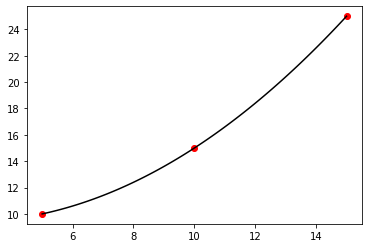

In [7]:
x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)

plt.scatter(X,Y,marker='o',color='r')
plt.plot(x,y,color='k')

In [9]:
x = sym.Symbol('x',real=True)
x

x

In [10]:
f = Interpolate(x,X,Y)
f = sym.simplify(f)
f

0.1*x**2 - 0.5*x + 10.0

In [11]:
df = sym.diff(f,x)
df

0.2*x - 0.5

In [12]:
func = sym.lambdify([x],f,'numpy')

func(2.5)

9.375

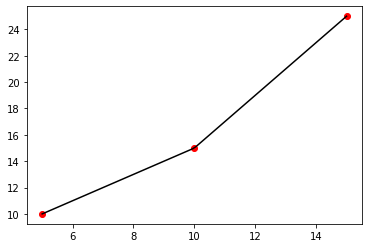

In [13]:
#No curvas suaves
x = np.linspace(X[0],X[-1],100)
y = np.interp(x,X,Y)
plt.scatter(X,Y,marker='o',color='r')
plt.plot(x,y,color='k')